In [28]:
import pandas as pd


In [29]:
vehicle_df=pd.read_csv("data.csv")

In [30]:
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   origin        398 non-null    int64  
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   year          398 non-null    int64  
 7   name          398 non-null    object 
 8   KPL           398 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [31]:
vehicle_df.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,KPL
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443


In [32]:
vehicle_df.describe()

,origin,cylinders,displacement,weight,acceleration,year,KPL
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,1.572864,5.454774,193.425879,2970.424623,15.568090,1976.010050,9.997073
std,0.802055,1.701004,104.269838,846.841774,2.757689,3.697627,3.322917
min,1.000000,3.000000,68.000000,1613.000000,8.000000,1970.000000,3.826293
25%,1.000000,4.000000,104.250000,2223.750000,13.825000,1973.000000,7.440015
50%,1.000000,4.000000,148.500000,2803.500000,15.500000,1976.000000,9.778305
75%,2.000000,8.000000,262.000000,3608.000000,17.175000,1979.000000,12.329168
max,3.000000,8.000000,455.000000,5140.000000,24.800000,1982.000000,19.811697


In [33]:
vehicle_df = vehicle_df[vehicle_df['horsepower'] != "?" ]

In [34]:
# vehicle_df = vehicle_df.reset_index(drop = True)

In [35]:
vehicle_df=vehicle_df.drop('name',axis=1)

In [36]:
vehicle_df.describe()

,origin,cylinders,displacement,weight,acceleration,year,KPL
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,1.576531,5.471939,194.411990,2977.584184,15.541327,1975.979592,9.967885
std,0.805518,1.705783,104.644004,849.402560,2.758864,3.683737,3.318250
min,1.000000,3.000000,68.000000,1613.000000,8.000000,1970.000000,3.826293
25%,1.000000,4.000000,105.000000,2225.250000,13.775000,1973.000000,7.227443
50%,1.000000,4.000000,151.000000,2803.500000,15.500000,1976.000000,9.672019
75%,2.000000,8.000000,275.750000,3614.750000,17.025000,1979.000000,12.329168
max,3.000000,8.000000,455.000000,5140.000000,24.800000,1982.000000,19.811697


In [37]:
%matplotlib inline
import matplotlib.pyplot as plt 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5915ff78d0>,
      dtype=object)

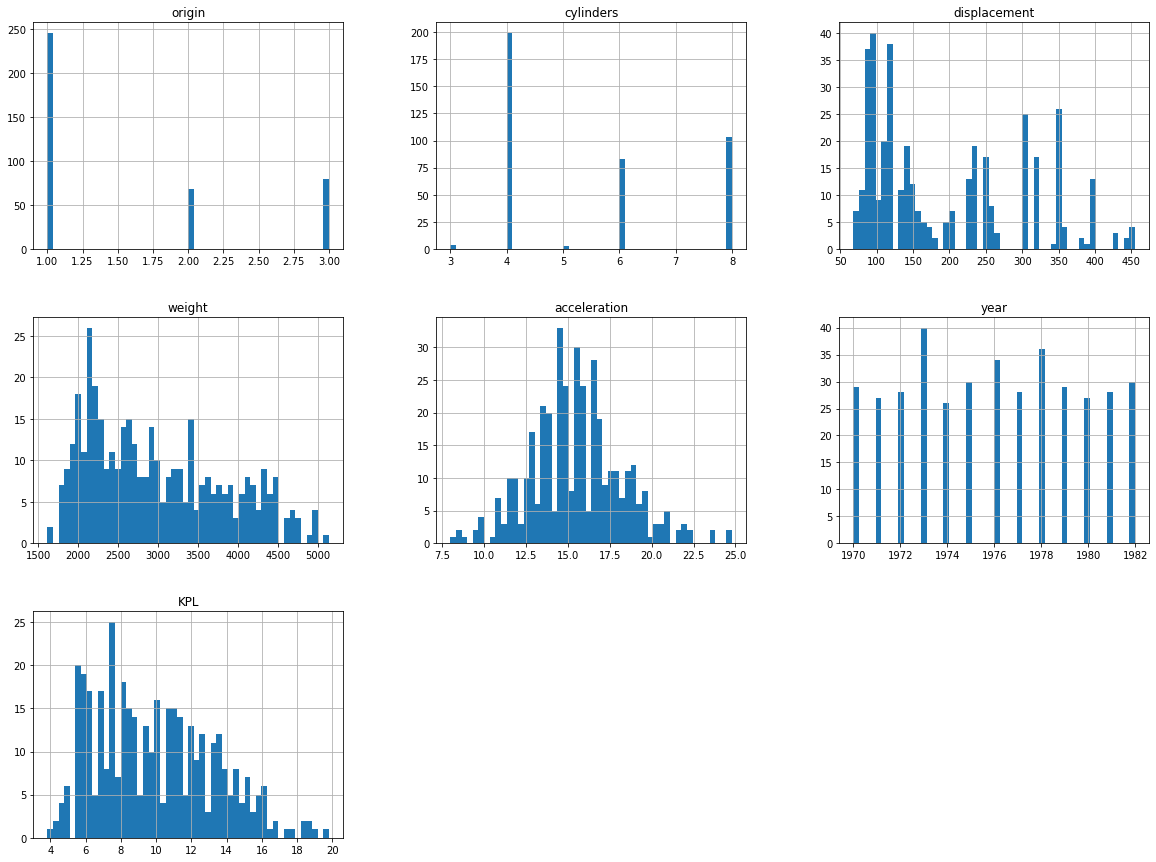

In [38]:
vehicle_df.hist(bins=50,figsize=(20,15))

## Data **Splitting**

In [39]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(vehicle_df,test_size=0.2,random_state=42)
print(f"train set {len(train_set)} \ntest set {len(test_set)}")

train set 313 
test set 79


In [40]:
vehicle_df_tr=train_set

In [41]:
vehicle_df_test=test_set

In [42]:
# vehicle_df=strat_train_set.copy()

# Correlation **test**

In [43]:
corr_matrix=vehicle_df.corr()
corr_matrix['KPL'].sort_values(ascending=False)

KPL             1.000000
year            0.580541
origin          0.565209
acceleration    0.423329
cylinders      -0.777618
displacement   -0.805127
weight         -0.832244
Name: KPL, dtype: float64

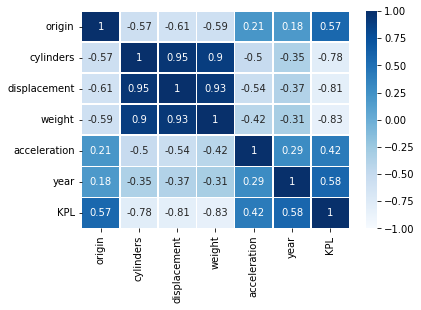

In [44]:
import seaborn as sn
sn.heatmap(data= vehicle_df.corr(),annot= True, linewidth= 0.5, cmap= 'Blues', cbar= True, vmin= -1, vmax= 1 )

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f59160758d0>,
      dtype=object)

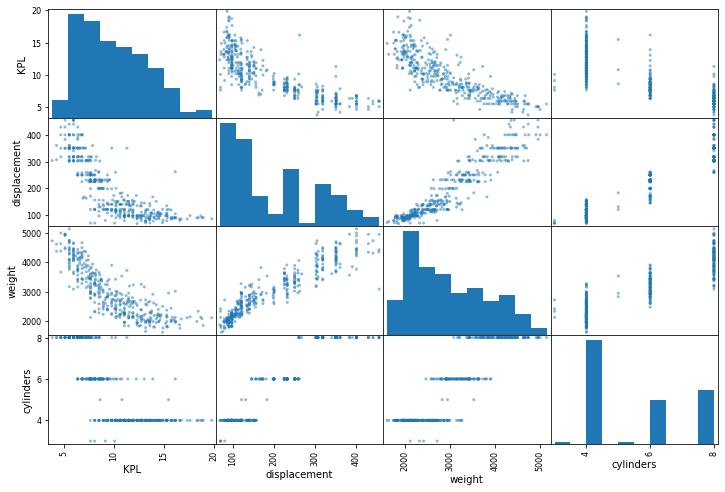

In [45]:
from pandas.plotting import scatter_matrix
attributes=['KPL','displacement','weight','cylinders','horsepower']
scatter_matrix(vehicle_df[attributes],figsize=(12,8),alpha=0.5)

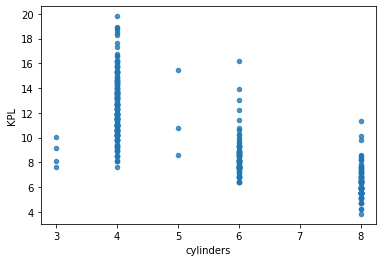

In [46]:
vehicle_df.plot(kind='scatter',x='cylinders',y='KPL',alpha=0.8)

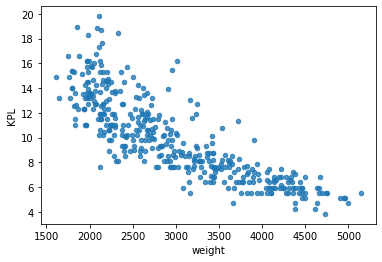

In [47]:
vehicle_df.plot(kind='scatter',x='weight',y='KPL',alpha=0.8)

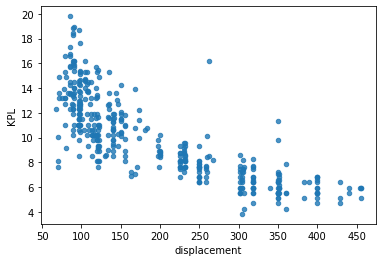

In [48]:
vehicle_df.plot(kind='scatter',x='displacement',y='KPL',alpha=0.8)

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([('imputer',SimpleImputer(strategy="median")),('Std_scaler',StandardScaler())])

In [50]:
vehicle_num_tr=my_pipeline.fit_transform(vehicle_df)

In [51]:
X=vehicle_df_tr.drop(['KPL'],axis=1)
Y=vehicle_df_tr['KPL']

In [52]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X,Y)

LinearRegression()

In [55]:
test_set_x=test_set.drop('KPL',axis=1)
test_set_y=test_set['KPL']

In [58]:
model.predict(test_set_x)

array([10.98637728, 11.0693581 , 14.67001658, 10.58417872, 12.08512953,
       12.9929794 ,  3.65068462, 13.06120384,  8.7395881 , 12.17901673,
        5.36197579, 10.74097794,  7.1312314 , 12.61834763,  9.27790978,
       12.43474785,  8.67081708, 14.19293553, 11.34186876, 12.73368962,
        8.05145787, 14.67130615, 15.08726669,  6.33211513, 12.09786143,
       10.89666548,  8.9389782 ,  6.87841644, 12.19994569, 10.24280189,
        5.69278409,  9.96939501,  8.84275427, 13.55911775,  5.22093521,
       15.39984003,  4.61861869, 10.35880528,  4.86402604,  3.0341341 ,
        5.46620789, 11.71746248, 14.76506731, 11.21779691,  5.09736855,
        4.16547531,  7.48615369, 13.33987732, 10.35294036, 12.84106491,
        5.05985318, 11.2733408 ,  9.83030525, 14.93768022, 12.01457698,
        7.56070739,  8.61932909,  9.65314583,  9.65577178, 11.05329223,
        3.60727105,  9.649431  , 10.9526796 ,  9.92623277, 12.73651888,
       12.21308189, 10.94096151, 12.51143714,  9.24195898,  4.28

In [71]:
import numpy as np
from sklearn.metrics import mean_squared_error
vehicle_predictions=model.predict(test_set_x)
mse=mean_squared_error(test_set_y,vehicle_predictions)
rmse=np.sqrt(lin_mse)

In [72]:
mse

1.9359584537063252

In [73]:
rmse

1.3913872407444037

In [67]:
from sklearn import metrics
error_score= metrics.r2_score(test_set_y, vehicle_predictions)
print('R Squared Error:',error_score)

R Squared Error: 0.7901500386456972


In [68]:
SSE= metrics.mean_squared_error(test_set_y, vehicle_predictions)
print('SSE:',SSE)

SSE: 1.9359584537063252


In [69]:
MAE= metrics.mean_absolute_error(test_set_y, vehicle_predictions)
print('MAE:',MAE)

MAE: 1.028754346356449


In [70]:
#Mean Squared Log Error
MSLE= metrics.mean_squared_log_error(test_set_y, vehicle_predictions)
print('MSLE:',MSLE)

MSLE: 0.01981210920517638
